# YOLOv8 Test Notebook
We will use this notebook as a method for testing and running the YOLOv8 architecture, and getting a sense of what the architecture looks like.

In [1]:
from ultralytics import YOLO

# Install and load the yolo v8 model
model = YOLO("yolov8n.pt")

First let's run the architecture on an image and look at the output. The base YOLOv8 is trained on the COCO dataset which has a collection of IDs we can work with for image identification. We're going to have the detector run on an image of zebras. 


0: 480x640 3 zebras, 160.0ms
Speed: 11.3ms preprocess, 160.0ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


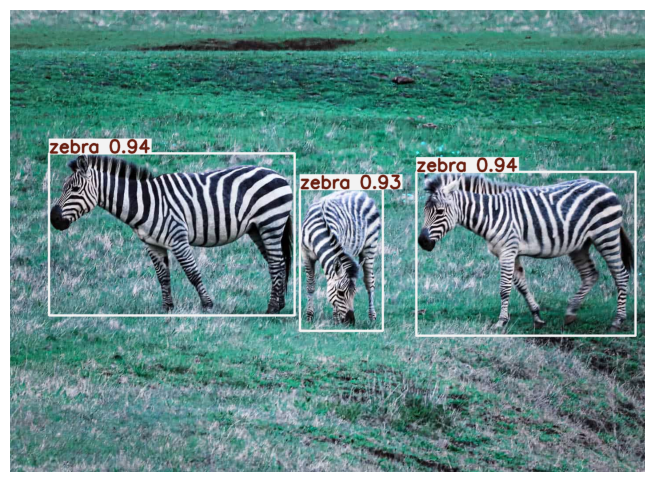

In [2]:
import cv2
import matplotlib.pyplot as plt

# Select the image to scan
IMG_PATH = "res/zebras.jpg"

# Read that
image = cv2.imread(IMG_PATH)

results = model(image, device="cpu")

# Draws the annotated plot
img_annotated = results[0].plot()  # draws boxes on the image

# Plot the selected frame
plt.figure(figsize=(10, 6))
plt.imshow(img_annotated)
plt.axis("off")
plt.show()

Our goal with this project is to *at least* implement the forward pass of the YOLOv8 model. To ensure that the forward pass is functional and produces expected results, we will develop a pipeline to take the model weights of a pretrained model, and export them to a binary format which our pipeline can import and process.

Let's see if we can at least pull the weights and biases of the first layer.

In [3]:
print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
   

In [25]:
print(model.model.model[0].conv.weight[0])
print(model.model.model[0].conv.weight[0].flatten().numpy().tobytes().hex())
print(model.model.model[0].conv.bias.shape)

tensor([[[-2.0544, -0.1887,  1.9064],
         [-6.5635,  0.5963,  6.9073],
         [-6.0107, -0.2439,  5.5624]],

        [[-2.5375,  0.1741,  2.7137],
         [-8.7353,  0.4975,  8.2043],
         [-6.6418, -0.0491,  6.2066]],

        [[-0.8890, -0.2656,  0.4437],
         [-3.8106,  0.5865,  3.4558],
         [-2.7355,  0.5547,  2.7899]]])
7b7a03c0b92d41bedc03f43fff07d2c011a6183fc108dd40ca57c0c0b8b979be4fffb140ee6522c09e46323effad2d40f7c30bc14fbdfe3e00450341ca89d4c0111e49bd469cc6408c9463bf460188be9529e33e34e073c04624163f692c5d408d122fc072fe0d3fee8d3240
torch.Size([16])


In [4]:
print(model.model.model[0].modules)

<bound method Module.modules of Conv(
  (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (act): SiLU(inplace=True)
)>
